# Set Up

The code below has been provided for you. Read through the code...slowly....

At the end answer the questions.

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data
data = {
    'age': [25, 30, 45, 40, 35, 50, 27, 55, 60, 23, 31, 43, 36, 29, 49],
    'gender': ['A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'A'],
    'income': [30000, 40000, 50000, 60000, 70000, 80000, 45000, 55000, 60000, 32000, 48000, 52000, 62000, 41000, 53000],
    # Skewed premiums: gender B has higher premiums on average
    'premium': [200, 300, 400, 450, 420, 500, 320, 410, 490, 230, 350, 460, 430, 340, 415]
}
df = pd.DataFrame(data)
df.head()

,age,gender,income,premium
0,25,A,30000,200
1,30,B,40000,300
2,45,A,50000,400
3,40,B,60000,450
4,35,A,70000,420



# Train a Simple Model

Convert categorical variables one_hot_encoding
Split the data into training and testing sets.
Fit a linear regression model to predict "premium" based on age, gender, and income.

In [22]:
X = df[['age', 'gender', 'income']]
X = pd.get_dummies(X)
y = df['premium']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train_excl = X_train.loc[:,['age','income']]

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Analyze Results
Make predictions and compare the mean squared error.

In [23]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1518.4319667992809


    age  income  gender_A  gender_B  actual_premium  predicted_premium
9    23   32000      True     False             230         234.471060
11   43   52000     False      True             460         404.364279
0    25   30000      True     False             200         231.291317
13   29   41000     False      True             340         312.837244
5    50   80000     False      True             500         552.534504


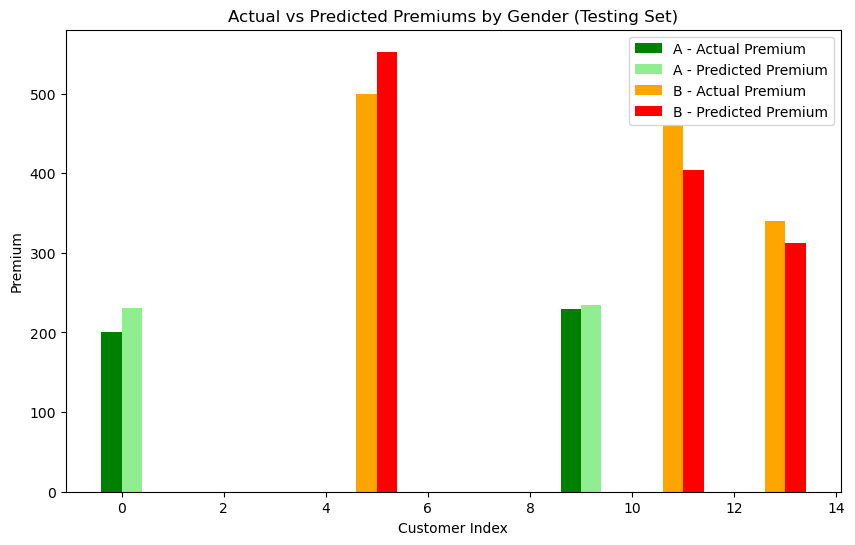

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df_test = X_test.copy()
df_test['actual_premium'] = y_test
df_test['predicted_premium'] = model.predict(X_test)

print(df_test)

# Separate data by gender for plotting
a_test_data = df_test[df_test['gender_A'] == True]
b_test_data = df_test[df_test['gender_B'] == True]

# Plot actual vs predicted premiums by gender
plt.figure(figsize=(10, 6))

# A: Actual vs Predicted
plt.bar(a_test_data.index - 0.2, a_test_data['actual_premium'], width=0.4, label='A - Actual Premium', color='green')
plt.bar(a_test_data.index + 0.2, a_test_data['predicted_premium'], width=0.4, label='A - Predicted Premium', color='lightgreen')

# B: Actual vs Predicted
plt.bar(b_test_data.index - 0.2, b_test_data['actual_premium'], width=0.4, label='B - Actual Premium', color='orange')
plt.bar(b_test_data.index + 0.2, b_test_data['predicted_premium'], width=0.4, label='B - Predicted Premium', color='red')

# Add labels and title
plt.xlabel('Customer Index')
plt.ylabel('Premium')
plt.title('Actual vs Predicted Premiums by Gender (Testing Set)')
plt.legend()
plt.show()

# Discussion

1. What ethical issues might arise from including sensitive attributes like gender?
2. Does the inclusion of gender affect premium predictions? 
3. What are some possible ways the gender data might be biased?